In [55]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold, train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [56]:
wine_data = pd.read_csv('winequality-white.csv', delimiter=';')

In [ ]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


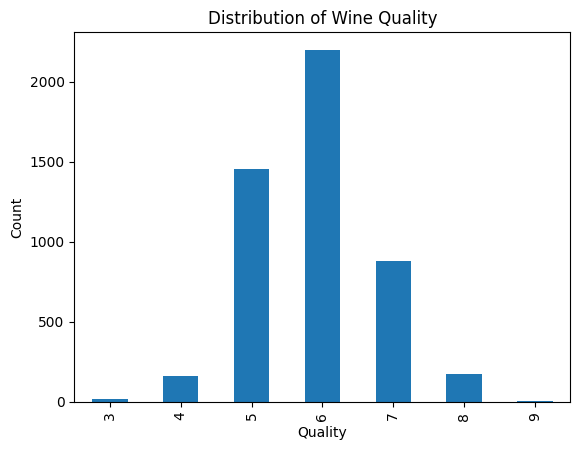

In [ ]:
wine_data.quality.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Distribution of Wine Quality')
plt.show()

In [ ]:
wine_data.isnull().values.any()

False

In [ ]:
alt.Chart(wine_data).mark_circle().encode(
    alt.X(alt.repeat("column"), type="quantitative"),
    alt.Y(alt.repeat("row"), type="quantitative"),
    color='quality:N'
).properties(
    width=150,
    height=150
).repeat(
    row=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
         'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
         'pH', 'sulphates', 'alcohol'],
    column=['alcohol', 'sulphates', 'pH', 'density', 'total sulfur dioxide',
            'free sulfur dioxide', 'chlorides', 'residual sugar', 'citric acid',
            'volatile acidity', 'fixed acidity']
)

alt.RepeatChart(...)

In [57]:
# Chia dữ liệu thành đặc trưng (features) và nhãn (labels)
X = wine_data.drop('quality', axis=1).values
y = wine_data['quality'].values

In [58]:
X_train_global, X_test_global, y_train_global, y_test_global = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [59]:
label_distribution = pd.Series(y_test_global).value_counts()

In [60]:
print("Phân bố các nhãn trong tập kiểm tra:")
print(label_distribution)

Phân bố các nhãn trong tập kiểm tra:
6    660
5    437
7    264
8     53
4     49
3      6
9      1
Name: count, dtype: int64


In [61]:
results_global = {}

# **SMOTE with RandomForet model || ADASYN with SVM Model || Borderline-SMOTE with MLPClassifer || Ensemble all models**

In [62]:
# Lưu trữ dự đoán của các model
predictions = {}

sampling_methods = {
    "SMOTE": SMOTE(random_state=42, k_neighbors=3),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42, kind='borderline-1'),
    "ADASYN": ADASYN(random_state=42, n_neighbors=3)
}

models = {
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42)
}

In [100]:
from sklearn.ensemble import VotingClassifier

for model_name, model in models.items():
    for sampling_name, sampling_method in sampling_methods.items():
        # Áp dụng phương pháp sampling
        X_train_resampled, y_train_resampled = sampling_method.fit_resample(X_train_global, y_train_global)

        # Huấn luyện mô hình
        model.fit(X_train_resampled, y_train_resampled)

        # Dự đoán trên tập kiểm tra
        y_pred = model.predict(X_test_global)

        # Lưu dự đoán
        key = f"{sampling_name}_{model_name}"
        predictions[key] = y_pred

        # Lưu kết quả
        results_global[key] = {
            "classification_report": classification_report(y_test_global, y_pred, output_dict=True)
        }

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [101]:
# Hiển thị kết quả từng mô hình với từng phương pháp sampling
for key, result in results_global.items():
    print(f"Results for {key}:\n")
    print("\nClassification Report:")
    print(pd.DataFrame(result["classification_report"]))
    print("\n" + "="*60 + "\n")

Results for SMOTE_GradientBoostingClassifier:


Classification Report:
                  3          4           5           6           7          8  \
precision  0.083333   0.197802    0.570743    0.619485    0.444444   0.200000   
recall     0.166667   0.367347    0.544622    0.510606    0.469697   0.471698   
f1-score   0.111111   0.257143    0.557377    0.559801    0.456722   0.280899   
support    6.000000  49.000000  437.000000  660.000000  264.000000  53.000000   

             9  accuracy    macro avg  weighted avg  
precision  0.0  0.505442     0.302258      0.541769  
recall     0.0  0.505442     0.361520      0.505442  
f1-score   0.0  0.505442     0.317579      0.518212  
support    1.0  0.505442  1470.000000   1470.000000  


Results for BorderlineSMOTE_GradientBoostingClassifier:


Classification Report:
             3          4           5           6           7          8    9  \
precision  0.0   0.236111    0.580169    0.624277    0.433898   0.257426  0.0   
recall  

**Ensemble all models**

In [ ]:
import numpy as np
from scipy.stats import mode

# Combine predictions using majority voting
# Sử dụng np.column_stack để kết hợp tất cả các dự đoán từ từng mô hình
all_preds = np.column_stack([predictions[key] for key in predictions])

# Sử dụng mode để thực hiện bỏ phiếu đa số (majority voting) cho các dự đoán
ensemble_pred, _ = mode(all_preds, axis=1)

# Tính toán báo cáo phân loại cho mô hình ensemble
ensemble_report = classification_report(y_test_global, ensemble_pred.ravel(), output_dict=True)

# Hiển thị kết quả của mô hình ensemble
print("Ensemble Model Results:\n")
print("\nClassification Report:")
print(pd.DataFrame(ensemble_report))

Ensemble Model Results:


Classification Report:
                  3          4           5           6           7          8  \
precision  0.250000   0.304348    0.679912    0.704584    0.550523   0.426471   
recall     0.166667   0.428571    0.704805    0.628788    0.598485   0.547170   
f1-score   0.200000   0.355932    0.692135    0.664532    0.573503   0.479339   
support    6.000000  49.000000  437.000000  660.000000  264.000000  53.000000   

             9  accuracy    macro avg  weighted avg  
precision  0.0  0.634014     0.416548      0.643878  
recall     0.0  0.634014     0.439212      0.634014  
f1-score   0.0  0.634014     0.423634      0.637078  
support    1.0  0.634014  1470.000000   1470.000000  


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **K-Fold Cross Validation**

In [7]:
# Initialize StratifiedKFold with 5 splits
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

clf = LogisticRegression(max_iter=10000, solver='liblinear')
clf.fit(X_train, y_train)

y_val_pred = clf.predict(X_val)
print("acc for val data: ", accuracy_score(y_val_pred, y_val))

acc for val data:  0.5040816326530613


In [9]:
# Khởi tạo các biến để lưu trữ kết quả tốt nhất
best_model = None
best_test_acc = 0

# Khởi tạo danh sách để lưu trữ các tập huấn luyện và kiểm tra cho từng fold
X_train_folds, y_train_folds, X_test_folds, y_test_folds = [], [], [], []

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Sử dụng StratifiedShuffleSplit để chia dữ liệu thành 70:30 cho huấn luyện và kiểm tra
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
    train_index_sss, test_index_sss = next(sss.split(X[train_index], y[train_index]))

    X_train_kfold = X[train_index][train_index_sss]
    y_train_kfold = y[train_index][train_index_sss]
    X_test_kfold = X[train_index][test_index_sss]
    y_test_kfold = y[train_index][test_index_sss]

    # Lưu trữ các tập huấn luyện và kiểm tra cho fold hiện tại vào danh sách
    X_train_folds.append(X_train_kfold)
    y_train_folds.append(y_train_kfold)
    X_test_folds.append(X_test_kfold)
    y_test_folds.append(y_test_kfold)

    # Khởi tạo và huấn luyện mô hình
    clf = LogisticRegression(max_iter=10000, solver='liblinear')
    clf.fit(X_train_kfold, y_train_kfold)

    # Dự đoán và đánh giá
    y_test_pred = clf.predict(X_test_kfold)
    test_acc = accuracy_score(y_test_kfold, y_test_pred)
    print("[Fold: {}] - acc for test data: {}".format(i, test_acc))

    # Kiểm tra và lưu trữ mô hình có độ chính xác cao nhất trên tập kiểm tra
    if test_acc > best_test_acc:
        best_test_acc = test_acc
        best_model = clf
        best_fold_index = i  # Lưu trữ chỉ số của fold tốt nhất

[Fold: 0] - acc for test data: 0.516156462585034
[Fold: 1] - acc for test data: 0.5297619047619048
[Fold: 2] - acc for test data: 0.5391156462585034
[Fold: 3] - acc for test data: 0.5331632653061225
[Fold: 4] - acc for test data: 0.516156462585034


In [10]:
print(best_fold_index)

2


In [11]:
# Sử dụng tập huấn luyện từ fold tốt nhất để thực hiện các bước tiếp theo
X_train_best = X_train_folds[best_fold_index]
y_train_best = y_train_folds[best_fold_index]

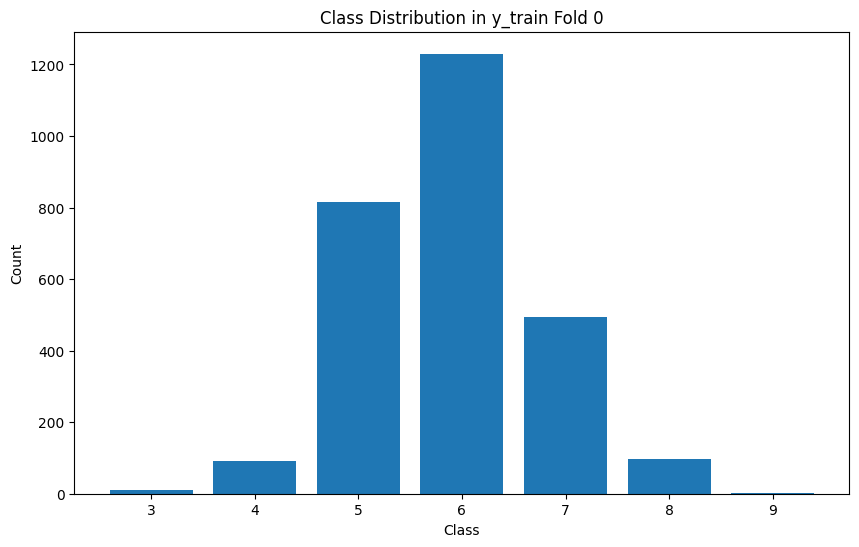

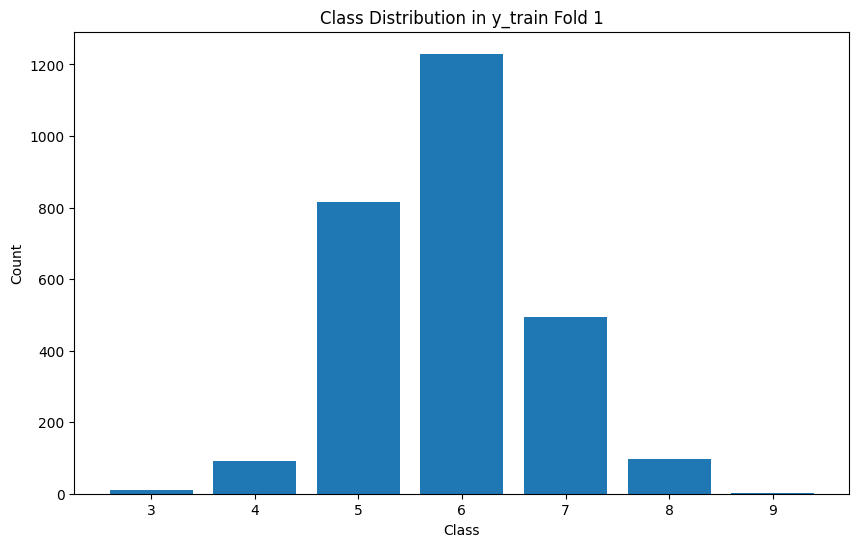

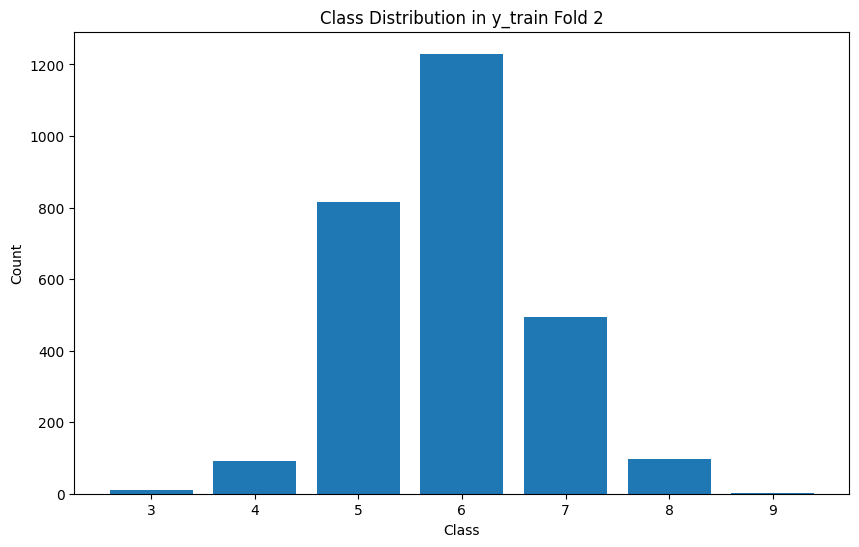

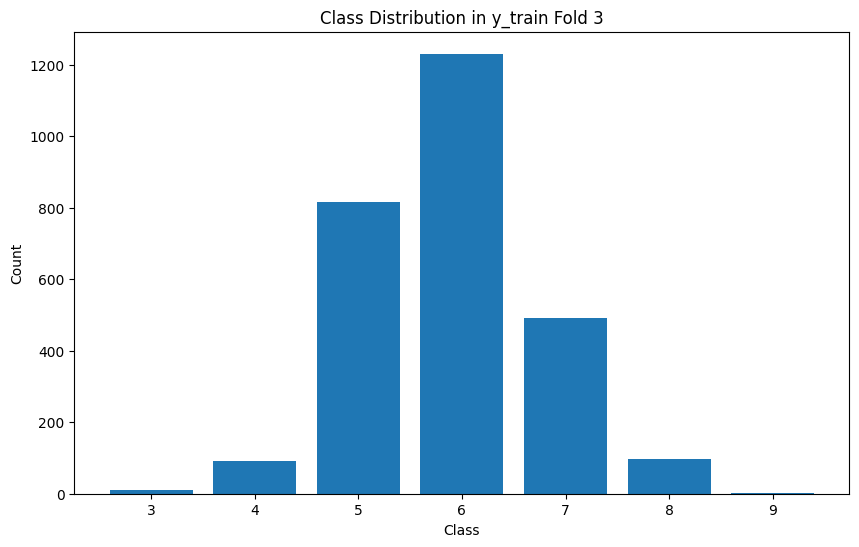

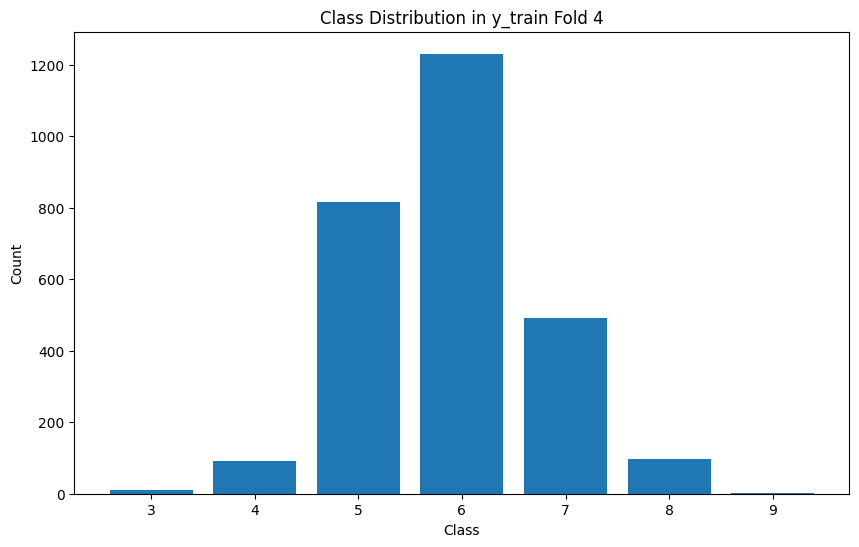

In [ ]:
# Plot distribution of classes in y_train_folds
for i, y_train_fold in enumerate(y_train_folds):
    unique, counts = np.unique(y_train_fold, return_counts=True)
    plt.figure(figsize=(10, 6))
    plt.bar(unique, counts)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title(f'Class Distribution in y_train Fold {i}')
    plt.xticks(unique)
    plt.show()

In [ ]:
print(X_train_folds)

[array([[ 7.1 ,  0.13,  0.29, ...,  3.16,  0.41,  9.7 ],
       [ 6.9 ,  0.19,  0.31, ...,  2.93,  0.52,  9.1 ],
       [ 7.6 ,  0.16,  0.44, ...,  3.11,  0.75, 10.3 ],
       ...,
       [ 5.4 ,  0.22,  0.29, ...,  3.76,  0.63, 11.  ],
       [ 8.2 ,  0.27,  0.43, ...,  3.1 ,  0.5 , 12.3 ],
       [ 6.3 ,  0.3 ,  0.29, ...,  3.22,  0.46, 12.9 ]]), array([[ 5.8 ,  0.23,  0.31, ...,  3.19,  0.37, 12.1 ],
       [ 6.  ,  0.28,  0.52, ...,  3.28,  0.51, 11.8 ],
       [ 6.8 ,  0.22,  0.35, ...,  3.24,  0.42,  9.  ],
       ...,
       [ 6.5 ,  0.23,  0.39, ...,  3.19,  0.43, 11.9 ],
       [ 5.9 ,  0.14,  0.25, ...,  3.49,  0.51, 10.8 ],
       [ 5.9 ,  0.2 ,  0.28, ...,  3.31,  0.57, 11.8 ]]), array([[ 7.4 ,  0.16,  0.3 , ...,  2.9 ,  0.44,  8.7 ],
       [ 6.  ,  0.17,  0.33, ...,  3.32,  0.58, 10.15],
       [ 6.4 ,  0.28,  0.43, ...,  3.09,  0.45,  9.4 ],
       ...,
       [ 7.  ,  0.25,  0.45, ...,  3.16,  0.48, 11.9 ],
       [ 6.6 ,  0.28,  0.36, ...,  3.29,  0.57, 11.6 ],
       

# **Apply Improve Data Sampling Method - Ensemble Model**

In [65]:
train_data = pd.concat([pd.DataFrame(X_train_best), pd.Series(y_train_best, name='quality')], axis=1)

In [108]:
sampling_methods = {
    'ADASYN': ADASYN(random_state=42, n_neighbors=2),
    'SMOTE': SMOTE(random_state=42, k_neighbors=2),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42, kind='borderline-1')
}

model_list = [
    RandomForestClassifier(random_state=42),
    KNeighborsClassifier(),
    GradientBoostingClassifier(random_state=42),
    DecisionTreeClassifier(random_state=42)
]

In [104]:
# This dictionary will store the sub-datasets for each sampling method
sub_datasets_dict = {}

# Loop over each sampling method
for method_name, sampler in sampling_methods.items():
    # Apply the sampling method
    X_resampled, y_resampled = sampler.fit_resample(train_data.drop(columns='quality'), train_data['quality'])

    # Combine the resampled data
    resampled_data = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='quality')], axis=1)

    # Separate data for class 6
    class_6_data = resampled_data[resampled_data['quality'] == 6]
    samples_per_class = len(class_6_data) // 4

    # Create sub-datasets for the current sampling method
    sub_dataset_1 = class_6_data[:samples_per_class]
    sub_dataset_2 = class_6_data[samples_per_class:2*samples_per_class]
    sub_dataset_3 = class_6_data[2*samples_per_class:3*samples_per_class]
    sub_dataset_4 = class_6_data[3*samples_per_class:]

    # Combine with non-class 6 data
    non_class_6_data = resampled_data[resampled_data['quality'] != 6]
    sub_datasets = [pd.concat([sub_dataset, non_class_6_data]) for sub_dataset in
                    [sub_dataset_1, sub_dataset_2, sub_dataset_3, sub_dataset_4]]

    # Store the sub-datasets for this sampling method in the dictionary
    sub_datasets_dict[method_name] = sub_datasets

In [105]:
# Display class distribution to verify balance
for method_name, sub_datasets in sub_datasets_dict.items():
    print(f"Class distribution for sampling method: {method_name}\n")
    for i, sub_dataset in enumerate(sub_datasets, start=1):
        print(f"Sub-dataset {i} distribution:\n{sub_dataset['quality'].value_counts()}\n")
    print("="*60 + "\n")

Class distribution for sampling method: ADASYN

Sub-dataset 1 distribution:
quality
8    1258
4    1257
7    1247
3    1231
9    1230
5    1082
6     307
Name: count, dtype: int64

Sub-dataset 2 distribution:
quality
8    1258
4    1257
7    1247
3    1231
9    1230
5    1082
6     307
Name: count, dtype: int64

Sub-dataset 3 distribution:
quality
8    1258
4    1257
7    1247
3    1231
9    1230
5    1082
6     307
Name: count, dtype: int64

Sub-dataset 4 distribution:
quality
8    1258
4    1257
7    1247
3    1231
9    1230
5    1082
6     309
Name: count, dtype: int64


Class distribution for sampling method: SMOTE

Sub-dataset 1 distribution:
quality
7    1230
5    1230
8    1230
3    1230
4    1230
9    1230
6     307
Name: count, dtype: int64

Sub-dataset 2 distribution:
quality
7    1230
5    1230
8    1230
3    1230
4    1230
9    1230
6     307
Name: count, dtype: int64

Sub-dataset 3 distribution:
quality
7    1230
5    1230
8    1230
3    1230
4    1230
9    1230
6     307


In [106]:
sub_dataset_names = ["sub_dataset_1", "sub_dataset_2", "sub_dataset_3", "sub_dataset_4"]

# Function to train models and evaluate
def train_and_evaluate_models(sub_datasets, method_name):
    models = []
    print(f"\n--- Training and evaluating models with {method_name} ---")
    for i, (model, sub_dataset) in enumerate(zip(model_list, sub_datasets)):
        sub_y = sub_dataset['quality']
        sub_X = sub_dataset.drop(columns='quality')
        model.fit(sub_X, sub_y)
        models.append(model)

        # Predict on the test set
        y_pred_test = model.predict(X_test_global)
        acc_test = accuracy_score(y_test_global, y_pred_test)

        model_name = model.__class__.__name__
        sub_dataset_name = sub_dataset_names[i]
        print(f"{model_name} trained on {sub_dataset_name}: Accuracy on test dataset = {acc_test}")

    return models

# Train and evaluate models on each sampling method using the sub_datasets_dict
models_adasyn = train_and_evaluate_models(sub_datasets_dict['ADASYN'], "ADASYN")
models_smote = train_and_evaluate_models(sub_datasets_dict['SMOTE'], "SMOTE")
models_borderline = train_and_evaluate_models(sub_datasets_dict['BorderlineSMOTE'], "BorderlineSMOTE")



--- Training and evaluating models with ADASYN ---
RandomForestClassifier trained on sub_dataset_1: Accuracy on test dataset = 0.5863945578231292
KNeighborsClassifier trained on sub_dataset_2: Accuracy on test dataset = 0.38231292517006804
GradientBoostingClassifier trained on sub_dataset_3: Accuracy on test dataset = 0.47619047619047616
DecisionTreeClassifier trained on sub_dataset_4: Accuracy on test dataset = 0.573469387755102

--- Training and evaluating models with SMOTE ---
RandomForestClassifier trained on sub_dataset_1: Accuracy on test dataset = 0.580952380952381
KNeighborsClassifier trained on sub_dataset_2: Accuracy on test dataset = 0.39387755102040817
GradientBoostingClassifier trained on sub_dataset_3: Accuracy on test dataset = 0.4816326530612245
DecisionTreeClassifier trained on sub_dataset_4: Accuracy on test dataset = 0.6006802721088436

--- Training and evaluating models with BorderlineSMOTE ---
RandomForestClassifier trained on sub_dataset_1: Accuracy on test datas

In [112]:
from itertools import product

# Function to optimize ensemble weights
def optimize_ensemble(models, method_name):
    predictions = [model.predict(X_test_global) for model in models]
    weights_range = np.linspace(0, 1, 11)
    best_accuracy = 0
    best_weights = None

    def ensemble_predict(weights, predictions):
        final_pred = sum(weight * pred for weight, pred in zip(weights, predictions))
        return np.round(final_pred).astype(int)

    num_models = len(models)
    for weights in product(weights_range, repeat=num_models):  # brute-force search
        if sum(weights) == 0:  # Avoid division by zero
            continue

        normalized_weights = [w / sum(weights) for w in weights]
        y_final = ensemble_predict(normalized_weights, predictions)
        accuracy = accuracy_score(y_test_global, y_final)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_weights = normalized_weights

    y_final_best = ensemble_predict(best_weights, predictions)
    final_accuracy = accuracy_score(y_test_global, y_final_best)
    final_report = classification_report(y_test_global, y_final_best, output_dict=True)

    print(f"\n{method_name} - Best Weights: {best_weights}")
    print(f"{method_name} - Final Ensemble Accuracy: {final_accuracy}\n")

    return {
        'best_weights': best_weights,
        'final_accuracy': final_accuracy,
        'classification_report': final_report,
        "precision": {label: final_report[str(label)]["precision"] for label in range(3, 10)},
        "recall": {label: final_report[str(label)]["recall"] for label in range(3, 10)},
        "f1_score": {label: final_report[str(label)]["f1-score"] for label in range(3, 10)}
    }

# Optimize ensemble for each method
ensemble_results = {}
ensemble_results["ADASYN"] = optimize_ensemble(models_adasyn, "ADASYN")
ensemble_results["SMOTE"] = optimize_ensemble(models_smote, "SMOTE")
ensemble_results["BorderlineSMOTE"] = optimize_ensemble(models_borderline, "BorderlineSMOTE")


ADASYN - Best Weights: [0.5, 0.0, 0.0, 0.5]
ADASYN - Final Ensemble Accuracy: 0.6925170068027211


SMOTE - Best Weights: [0.5, 0.0, 0.0, 0.5]
SMOTE - Final Ensemble Accuracy: 0.6925170068027211


BorderlineSMOTE - Best Weights: [0.5, 0.0, 0.0, 0.5]
BorderlineSMOTE - Final Ensemble Accuracy: 0.6925170068027211



In [113]:
# Combine individual and ensemble results for easier access and plotting
all_results = {
    "individual_models": results_global,
    "ensemble_models": ensemble_results
}

In [114]:
for method_name, results in ensemble_results.items():
    print(f"Improved DataSampling-Ensemble model results for {method_name}:")
    print(f"Best Weights: {results['best_weights']}")
    print(f"Final Accuracy: {results['final_accuracy']:.4f}")
    print(pd.DataFrame(results['classification_report']).transpose())
    print("\n" + "="*60 + "\n")

Improved DataSampling-Ensemble model results for ADASYN:
Best Weights: [0.5, 0.0, 0.0, 0.5]
Final Accuracy: 0.6925
              precision    recall  f1-score      support
3              0.500000  0.500000  0.500000     6.000000
4              0.493151  0.734694  0.590164    49.000000
5              0.722753  0.864989  0.787500   437.000000
6              0.855392  0.528788  0.653558   660.000000
7              0.572603  0.791667  0.664547   264.000000
8              0.446809  0.792453  0.571429    53.000000
9              1.000000  1.000000  1.000000     1.000000
accuracy       0.692517  0.692517  0.692517     0.692517
macro avg      0.655815  0.744656  0.681028  1470.000000
weighted avg   0.737017  0.692517  0.689884  1470.000000


Improved DataSampling-Ensemble model results for SMOTE:
Best Weights: [0.5, 0.0, 0.0, 0.5]
Final Accuracy: 0.6925
              precision    recall  f1-score      support
3              0.500000  0.500000  0.500000     6.000000
4              0.493151  0.7

# **Plot chart for visualization**

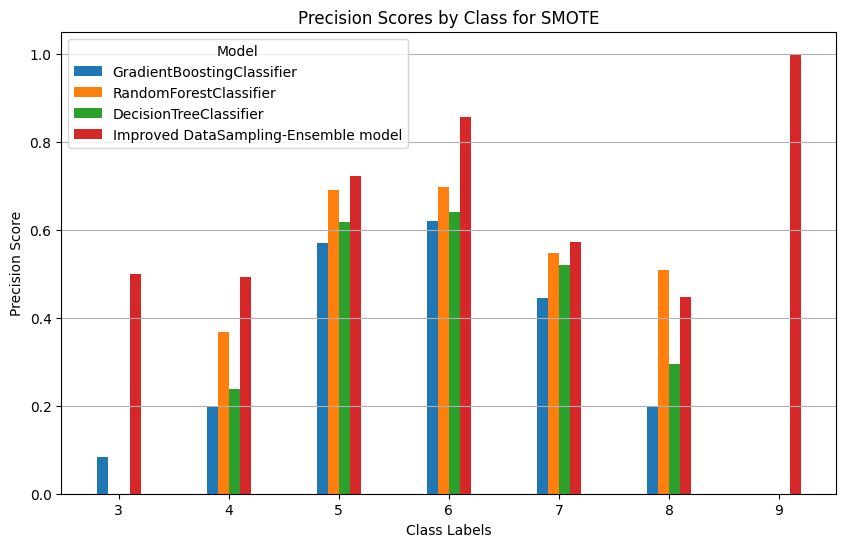

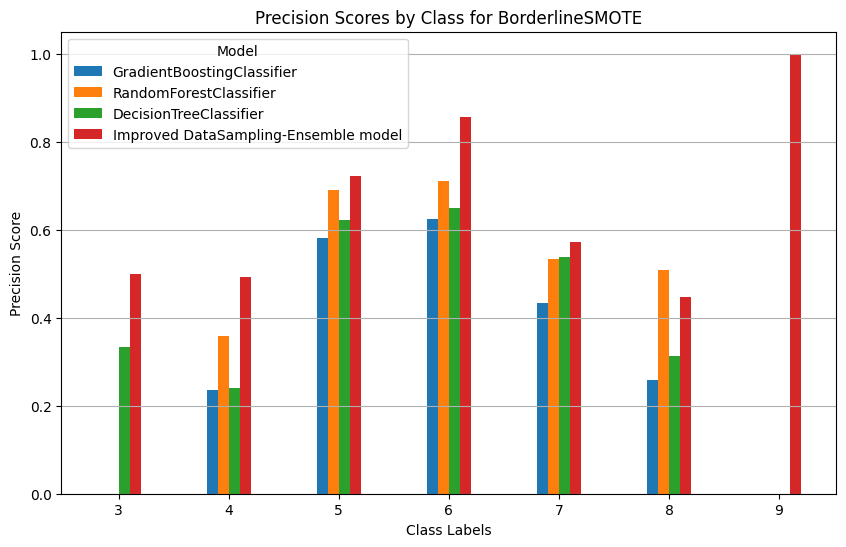

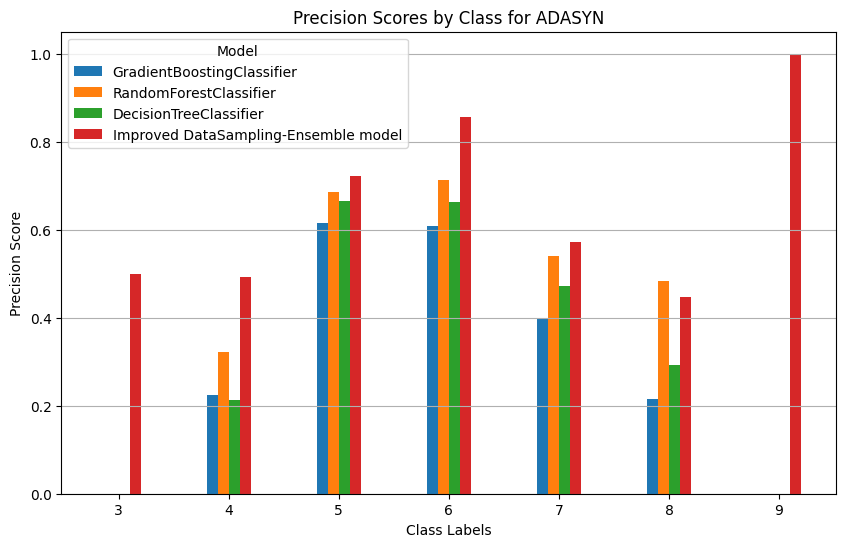

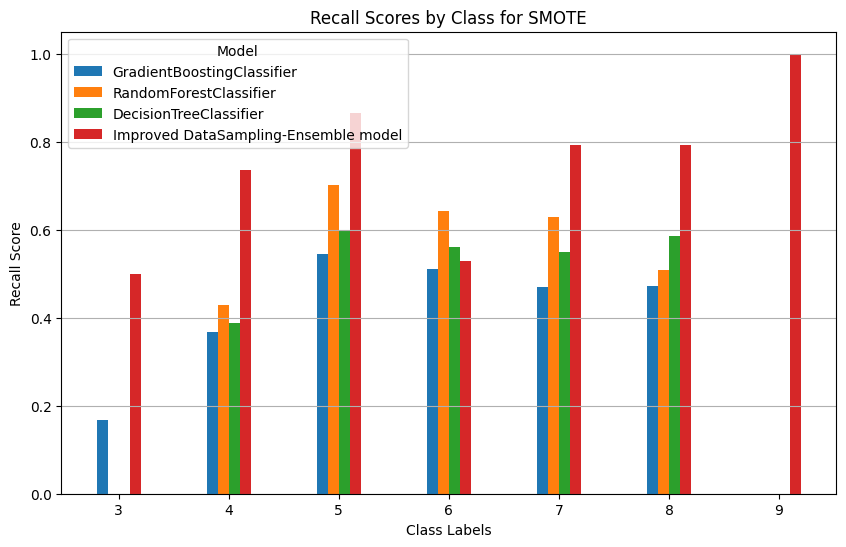

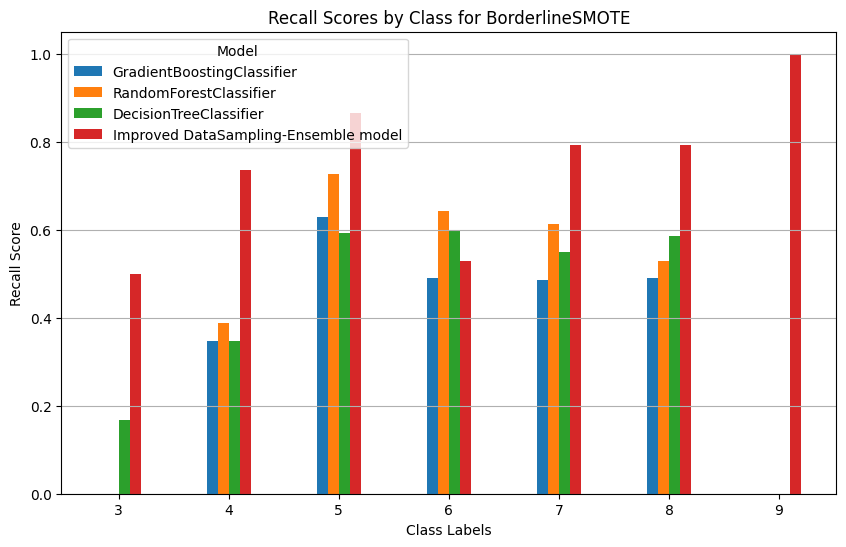

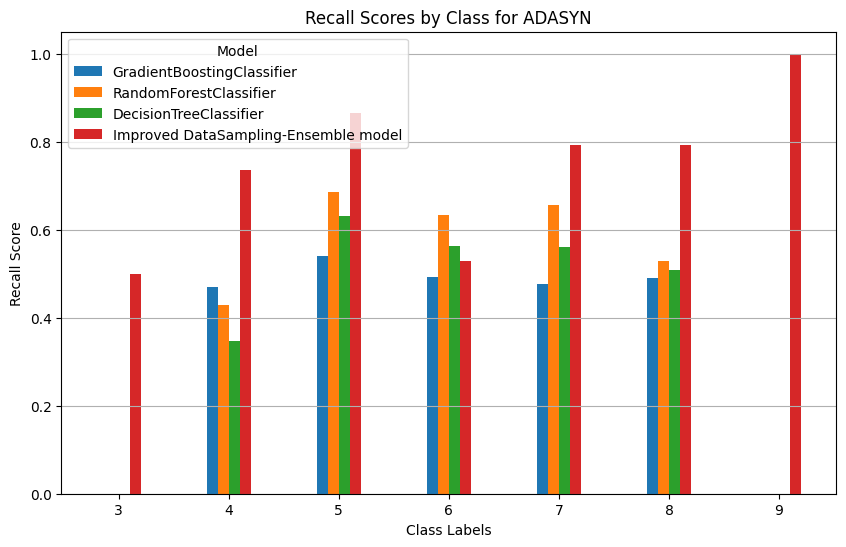

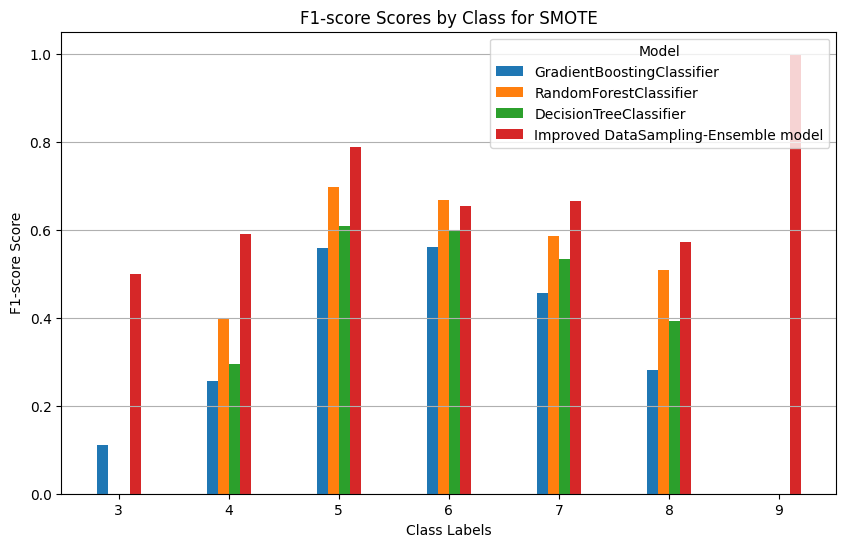

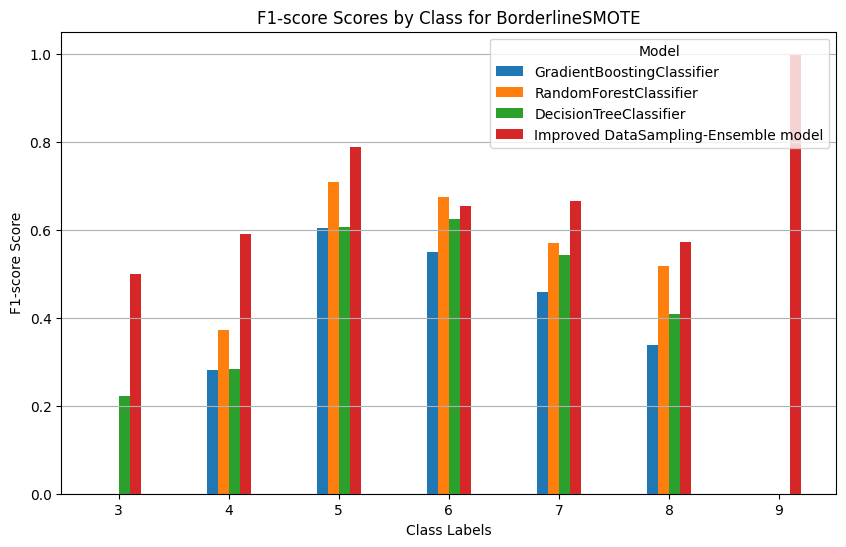

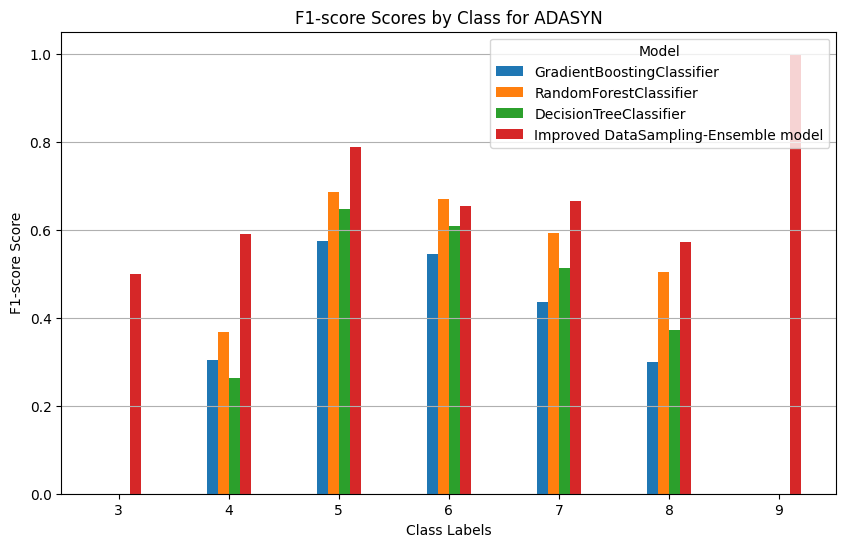

In [127]:
import matplotlib.pyplot as plt
import numpy as np

# Function to extract and organize the data for plotting
def extract_and_organize_data(all_results, metric_name):
    organized_data = {}

    # Extract data for individual models
    for key, results in all_results["individual_models"].items():
        method_name, model_name = key.split('_', 1)  # Split the key into sampling method and model name
        if method_name not in organized_data:
            organized_data[method_name] = {}
        organized_data[method_name][model_name] = [
            results['classification_report'][str(class_label)][metric_name] for class_label in range(3, 10)  # Assuming class labels 3 to 9
        ]

    # Extract data for ensemble models
    for method_name, results in all_results["ensemble_models"].items():
        organized_data[method_name]["Improved DataSampling-Ensemble model"] = [
            results['classification_report'][str(class_label)][metric_name] for class_label in range(3, 10)  # Assuming class labels 3 to 9
        ]

    return organized_data

# Function to plot the data as bar charts
def plot_comparison_for_sampling_methods(organized_data, metric_name):
    for sampling_method, models_data in organized_data.items():
        class_labels = range(3, 10)  # Assuming class labels 3 to 9
        num_classes = len(class_labels)
        width = 0.1  # Width of each bar group

        plt.figure(figsize=(10, 6))

        # Plot each model's data
        for i, (model_name, scores) in enumerate(models_data.items()):
            positions = np.arange(num_classes) + i * width  # Position each bar group
            plt.bar(positions, scores, width=width, label=model_name)

        plt.xlabel('Class Labels')
        plt.ylabel(f'{metric_name.capitalize()} Score')
        plt.title(f'{metric_name.capitalize()} Scores by Class for {sampling_method}')
        plt.xticks(np.arange(num_classes) + width * (len(models_data) - 1) / 2, class_labels)
        plt.legend(title='Model')
        plt.grid(True, axis='y')
        plt.show()

# Combine individual and ensemble results for easier access and plotting
all_results = {
    "individual_models": results_global,
    "ensemble_models": ensemble_results
}

# Extract and organize data for each metric
precision_data = extract_and_organize_data(all_results, "precision")
recall_data = extract_and_organize_data(all_results, "recall")
f1_data = extract_and_organize_data(all_results, "f1-score")

# Plot comparisons for each sampling method using bar charts
plot_comparison_for_sampling_methods(precision_data, "precision")
plot_comparison_for_sampling_methods(recall_data, "recall")
plot_comparison_for_sampling_methods(f1_data, "f1-score")


In [128]:
def extract_macro_avg(all_results):
    organized_data = {}

    # Extract data for individual models
    for key, results in all_results["individual_models"].items():
        method_name, model_name = key.split('_', 1)
        if method_name not in organized_data:
            organized_data[method_name] = {}
        organized_data[method_name][model_name] = {
            'precision': results['classification_report']["macro avg"]["precision"],
            'recall': results['classification_report']["macro avg"]["recall"],
            'f1-score': results['classification_report']["macro avg"]["f1-score"]
        }

    # Extract data for ensemble models
    for method_name, results in all_results["ensemble_models"].items():
        organized_data[method_name]["Improved DataSampling-Ensemble model"] = {
            'precision': results['classification_report']["macro avg"]["precision"],
            'recall': results['classification_report']["macro avg"]["recall"],
            'f1-score': results['classification_report']["macro avg"]["f1-score"]
        }

    return organized_data

def plot_macro_avg(organized_data):
    metrics = ["precision", "recall", "f1-score"]
    for sampling_method, models_data in organized_data.items():
        plt.figure(figsize=(10, 6))
        model_names = list(models_data.keys())
        positions = np.arange(len(model_names))  # Create positions for each set of bars

        for i, metric in enumerate(metrics):
            plt.bar(positions + i * 0.25, [models_data[model_name][metric] for model_name in model_names],
                    width=0.25, label=metric.capitalize())

        plt.xlabel('Models')
        plt.ylabel('Score')
        plt.title(f'Macro Avg Scores by Model for {sampling_method}')
        plt.xticks(positions + 0.25, model_names, rotation=45)
        plt.legend(title='Metric')
        plt.grid(True, axis='y')
        plt.show()

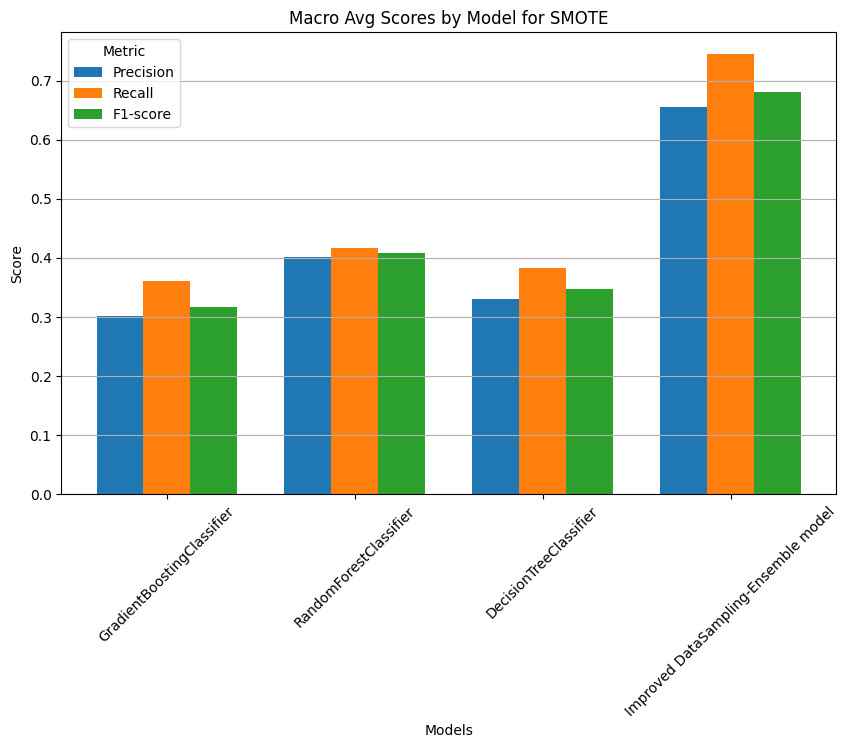

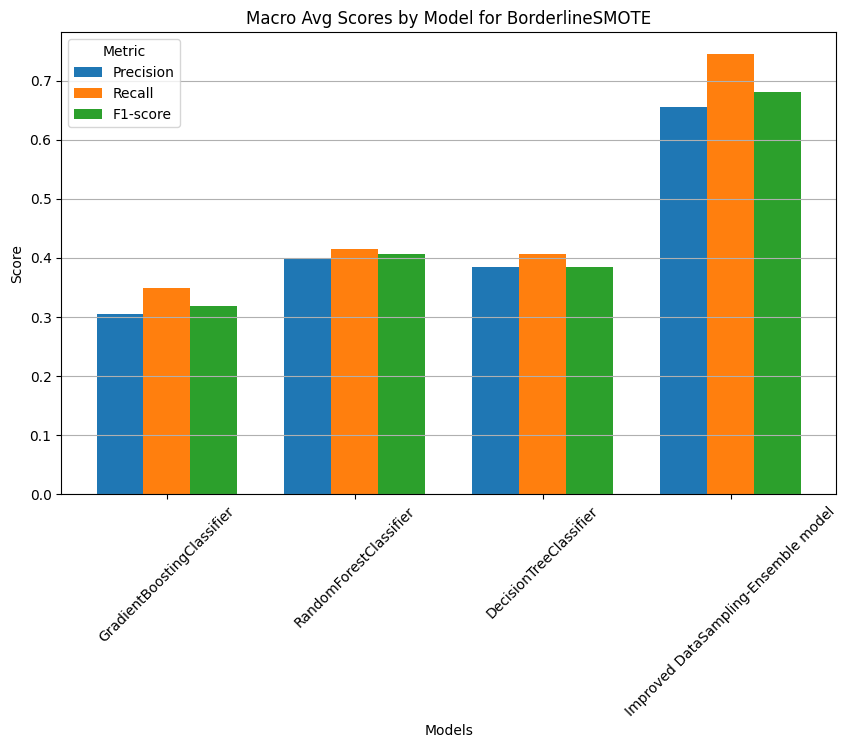

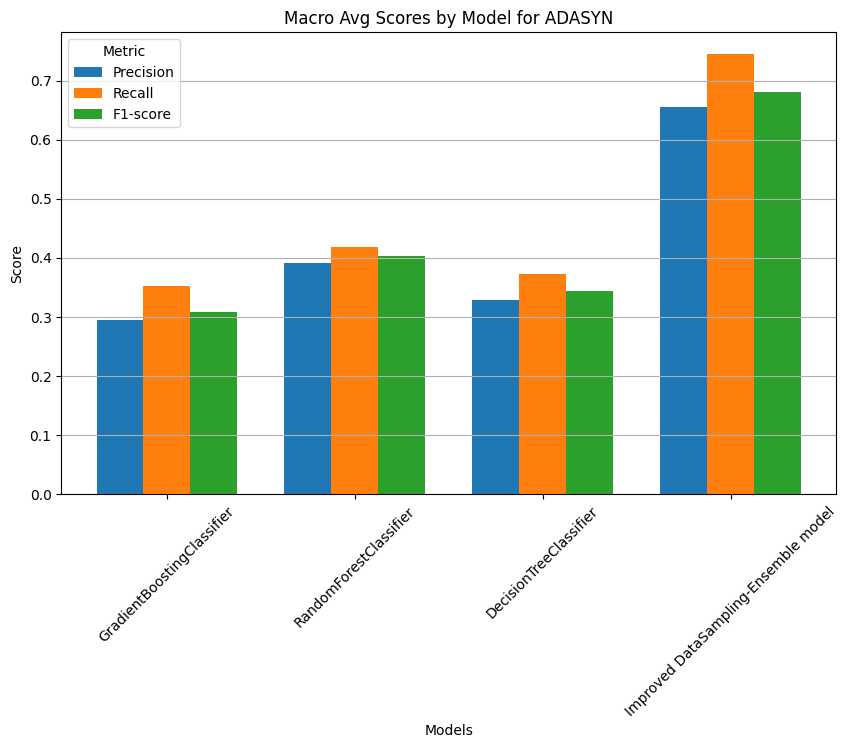

In [129]:
macro_avg_data = extract_macro_avg(all_results)
plot_macro_avg(macro_avg_data)